In [62]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from statistics import mean

# Used to convert the lists back into list form not string
import ast

# Used to graph
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Path to the dataframe
data_path = 'SavedData/biz_large.csv'

# Set the file path to a dataframe
biz_df = pd.read_csv(data_path)

# Convert the list columns back to lists not strings
biz_df['customers_sorted_unique'] = biz_df['customers_sorted_unique'].apply(ast.literal_eval)
biz_df['customers_tx_count'] = biz_df['customers_tx_count'].apply(ast.literal_eval)

In [64]:
len(biz_df)

79

## Most Popular Businesses

In [65]:
# Getting the most popular businesses
# Creates the column featuring number of unique users
biz_df['unique_cust_count'] = biz_df['customers_sorted_unique'].apply(len)

# Average unique customers
unique_cust_list = list(biz_df['unique_cust_count'])
avg_unique_cust_count = mean(unique_cust_list)

# Sorts dataframe by this new column and extracts the top 10 business names
pop_biz = biz_df.sort_values(by='unique_cust_count', ascending=False)

# Create two lists of this information
pop_biz_names = list(pop_biz['name'])
pop_biz_names.append('biz_average')
pop_biz_custs = list(pop_biz['unique_cust_count'])
pop_biz_custs.append(avg_unique_cust_count)

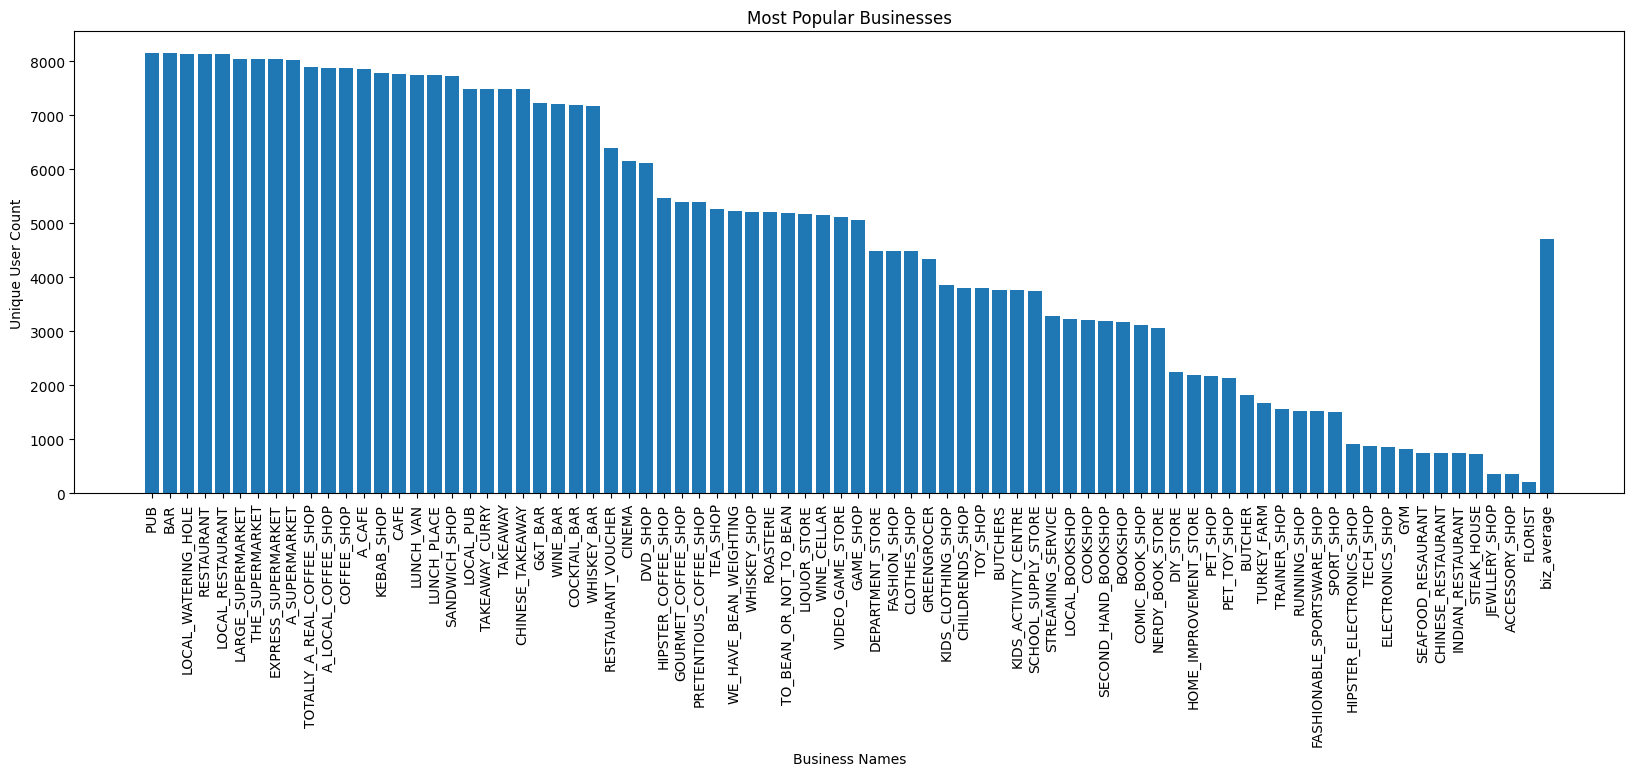

In [81]:
plt.figure(figsize=(20, 6))

plt.bar(pop_biz_names, pop_biz_custs)
plt.xticks(rotation=90)

plt.xlabel('Business Names')
plt.ylabel('Unique User Count')
plt.title('Most Popular Businesses')

plt.show()

## Businesses with Great Loyalty

In [83]:
# Getting the most loyal businesses
# Creates the column featuring the highest average customer re-occurence
biz_df['cust_loyalty'] = biz_df['customers_tx_count'].apply(lambda x: mean(x) if x else None)

# Finds the average of the averages
cust_loyalty_list = list(biz_df['cust_loyalty'])
avg_cust_loyalty_list = mean(cust_loyalty_list)

# Sorts dataframe by this new column and extracts the top 10 business names
pop_biz = biz_df.sort_values(by='unique_cust_count', ascending=False)